In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
n = 100

X1 = np.random.uniform(1, 10, n)
X2 = np.random.uniform(10, 50, n)
X3 = np.random.uniform(100, 500, n)

y = 5 + 2*X1 - 0.5*X2 + 0.1*X3 + np.random.normal(0, 5, n)

# Prepare Data
X = np.c_[np.ones(n), X1, X2, X3]
y = y.reshape(-1, 1)

In [3]:
def mse(X, y, theta):
    return np.mean((X @ theta - y)**2)

def gradient(X, y, theta):
    m = len(y)
    return (2/m) * X.T @ (X @ theta - y)

## 1️⃣ Batch Gradient Descent

Uses *all training data* before each update — stable but slow.

$$
\theta := \theta - \eta \, \nabla_\theta J(\theta)
$$

where  

$$
\nabla_\theta J(\theta) = \frac{2}{m} X^T (X\theta - y)
$$

In [4]:
def batch_gradient_descent(X, y, lr = 0.00001, epochs = 500):
    theta = np.zeros((X.shape[1], 1))
    costs = []
    for _ in range(epochs):
        grad = gradient(X, y, theta)
        theta -= lr * grad
        costs.append(mse(X, y, theta))
    return theta, costs

## 2️⃣ Stochastic Gradient Descent (SGD)

Updates parameters after *each training example* — fast but noisy.

$$
\theta := \theta - \eta \, \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

$$
\nabla_\theta J(\theta; x^{(i)}, y^{(i)}) = 2x^{(i)}(x^{(i)T}\theta - y^{(i)})
$$

In [5]:
def stochastic_gradient_descent(X, y, lr=0.00005, epochs = 50):
    theta = np.zeros((X.shape[1], 1))
    m = len(y)
    costs = []
    for _ in range(epochs):
        for i in range(m):
            idx = np.random.randint(0, m)
            Xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            grad = (2 * Xi.T @ (Xi @ theta - yi))
            theta -= lr * grad
        costs.append(mse(X, y, theta))
    return theta, costs

## 3️⃣ Mini-Batch Gradient Descent

Uses *a small random batch* of data per step — balance between Batch and SGD.

$$
\theta := \theta - \eta \, \frac{2}{b} X_b^T (X_b\theta - y_b)
$$

In [6]:
def mini_batch_gradient_descent(X, y, lr=0.00005, epochs=100, batch_size=16):
    theta = np.zeros((X.shape[1], 1))
    m = len(y)
    costs = []
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuff, y_shuff = X[indices], y[indices]
        for i in range(0, m, batch_size):
            Xb = X_shuff[i:i+batch_size]
            yb = y_shuff[i:i+batch_size]
            grad = gradient(Xb, yb, theta)
            theta -= lr* grad
        costs.append(mse(X, y, theta))
    return theta, costs

## 4️⃣ Momentum Gradient Descent

Adds a *velocity* term to accumulate past gradients (smoother updates).

$$
v_t = \beta v_{t-1} + (1 - \beta) \, \nabla_\theta J(\theta)
$$

$$
\theta := \theta - \eta v_t
$$

In [7]:
def momentum_gd(X, y, lr=0.00005, epochs=500, beta=0.9):
    theta = np.zeros((X.shape[1],1))
    v = np.zeros_like(theta)
    costs = []
    for _ in range(epochs):
        grad = gradient(X, y, theta)
        v = beta * v + (1 - beta) * grad
        theta -= lr* v
        costs.append(mse(X, y, theta))
    return theta, costs

## 5️⃣ Nesterov Accelerated Gradient (NAG)

Looks *ahead* before updating — anticipates future direction.

$$
v_t = \beta v_{t-1} + \eta \, \nabla_\theta J(\theta - \beta v_{t-1})
$$

$$
\theta := \theta - v_t
$$

In [8]:
def nesterov_gd(X, y, lr = 0.00005, epochs=500, beta=0.9):
    theta = np.zeros((X.shape[1], 1))
    v = np.zeros_like(theta)
    costs = []
    for _ in range(epochs):
        look_ahead = theta - beta * v
        grad = gradient(X, y, look_ahead)
        v = beta * v + lr * grad
        theta -= v
        costs.append(mse(X, y, theta))
    return theta, costs

## 6️⃣ AdaGrad (Adaptive Gradient)

Adapts learning rate per parameter — smaller steps in steep directions.

$$
G_t = G_{t-1} + g_t^2
$$

$$
\theta := \theta - \frac{\eta}{\sqrt{G_t + \epsilon}} \, g_t
$$

In [9]:
def adagrad(X, y, lr=0.1, epochs=500, eps=1e-8):
    theta = np.zeros((X.shape[1], 1))
    G = np.zeros_like(theta)
    costs = []
    for _ in range(epochs):
        grad = gradient(X, y, theta)
        G += grad ** 2
        theta -= lr* grad / (np.sqrt(G) + eps)
        costs.append(mse(X, y, theta))
    return theta, costs

## 7️⃣ RMSProp

Uses an exponential moving average of squared gradients to maintain steady learning.

$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2
$$

$$
\theta := \theta - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \, g_t
$$

In [10]:
def rmsprop(X, y, lr=0.01, epochs=500, beta=0.9, eps=1e-8):
    theta = np.zeros((X.shape[1], 1))
    E_grad2 = np.zeros_like(theta)
    costs = []
    for _ in range(epochs):
        grad = gradient(X, y, theta)
        E_grad2 = beta * E_grad2 + (1 - beta) * grad**2
        theta -= lr * grad / (np.sqrt(E_grad2) + eps)
        costs.append(mse(X, y, theta))
    return theta, costs

## 8️⃣ Adam (Adaptive Moment Estimation)

Combines **Momentum** and **RMSProp** — adaptive step size & direction.

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

Bias-corrected estimates:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Update rule:

$$
\theta := \theta - \frac{\eta \, \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

In [11]:
def adam(X, y, lr=0.01, epochs=500, beta1=0.9, beta2=0.999, eps=1e-8):
    theta = np.zeros((X.shape[1], 1))
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    costs = []
    for t in range(1, epochs + 1):
        grad = gradient(X, y, theta)
        m_t = beta1 * m_t + (1 - beta1) * grad
        v_t = beta2 * v_t + (1 - beta2) * (grad ** 2)
        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)
        theta -= lr* m_hat / (np.sqrt(v_hat) + eps)
        costs.append(mse(X, y, theta))
    return theta, costs

In [12]:
optimizers = {
    "Batch GD": batch_gradient_descent,
    "SGD": stochastic_gradient_descent,
    "Mini-Batch GD": mini_batch_gradient_descent,
    "Momentum": momentum_gd,
    "Nesterov": nesterov_gd,
    "AdaGrad": adagrad,
    "RMSProp": rmsprop,
    "Adam": adam
}

In [13]:
results = {}
for name, func in optimizers.items():
    theta, costs = func(X, y)
    results[name] = costs


C:\Users\ADITYA NARANJE\AppData\Local\Temp\ipykernel_15036\3220983863.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((X @ theta - y)**2)
C:\Users\ADITYA NARANJE\AppData\Local\Temp\ipykernel_15036\3580902105.py:10: RuntimeWarning: overflow encountered in matmul
  grad = (2 * Xi.T @ (Xi @ theta - yi))
C:\Users\ADITYA NARANJE\AppData\Local\Temp\ipykernel_15036\3580902105.py:11: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad
C:\Users\ADITYA NARANJE\AppData\Local\Temp\ipykernel_15036\3220983863.py:6: RuntimeWarning: overflow encountered in matmul
  return (2/m) * X.T @ (X @ theta - y)
C:\Users\ADITYA NARANJE\AppData\Local\Temp\ipykernel_15036\3757206972.py:12: RuntimeWarning: invalid value encountered in subtract
  theta -= lr* grad
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\ADITYA NARANJE\AppData

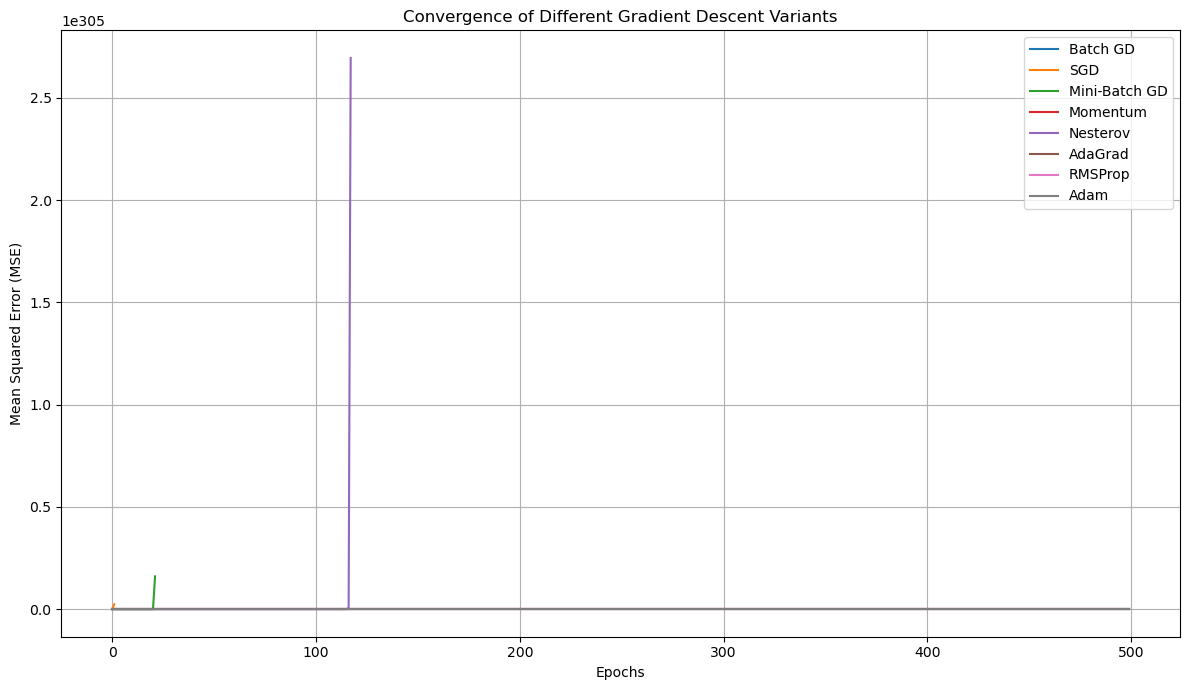

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
for name, costs in results.items():
    plt.plot(costs, label=name)
plt.title("Convergence of Different Gradient Descent Variants")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary Comparison

| Optimizer | Uses Full Data? | Speed | Stability | Adapts LR? | Key Idea |
|:-----------|:---------------:|:------:|:-----------:|:------------:|:----------|
| **Batch GD** | ✅ Yes | ❌ Slow | ✅ Very Stable | ❌ No | Uses all data for each update |
| **SGD** | ❌ No | ✅ Fast | ⚠️ Noisy | ❌ No | Updates after every sample |
| **Mini-Batch GD** | ⚡ Partial | ✅ Balanced | ✅ Good | ❌ No | Mix of Batch and SGD |
| **Momentum** | ✅ Yes | ✅ Faster | ✅ Smooth | ❌ No | Adds velocity term |
| **Nesterov** | ✅ Yes | ✅ Fast | ✅ Stable | ❌ No | Looks ahead for better update |
| **AdaGrad** | ✅ Yes | ⚠️ Slows over time | ✅ Stable | ✅ Yes | Adapts per-parameter step |
| **RMSProp** | ✅ Yes | ✅ Fast | ✅ Stable | ✅ Yes | Smooths AdaGrad behavior |
| **Adam** | ✅ Yes | 🚀 Very Fast | ✅ Very Stable | ✅ Yes | Combines Momentum + RMSProp |

---

### Symbols

<table>
<tr><th>Symbol</th><th>Meaning</th></tr>
<tr><td>$$\theta$$</td><td>Model parameters</td></tr>
<tr><td>$$\eta$$</td><td>Learning rate</td></tr>
<tr><td>$$J(\theta)$$</td><td>Cost function</td></tr>
<tr><td>$$g_t$$</td><td>Gradient at iteration \(t\)</td></tr>
<tr><td>$$\beta, \beta_1, \beta_2$$</td><td>Momentum / decay rates</td></tr>
<tr><td>$$m_t, v_t$$</td><td>Moving averages of gradient and squared gradient</td></tr>
<tr><td>$$\epsilon$$</td><td>Small constant to avoid division by zero</td></tr>
</table>